## Notebook to create raster masks from polygons
Needed for semantic segmentation of raster images. 

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os, sys
import numpy as np
import matplotlib.pyplot as plt
import rasterio, rasterio.plot
import xarray as xr
import rioxarray as rxr
import sklearn.cluster
from tqdm import tqdm
import pandas as pd
import geopandas as gpd
import gdal
import osr
import loadpaths
import land_cover_analysis as lca
import land_cover_visualisation as lcv

### Example:
- Load tiff tile as example image
- Get the class polygons
- Find intersections of polygons and image tile
- Create raster mask

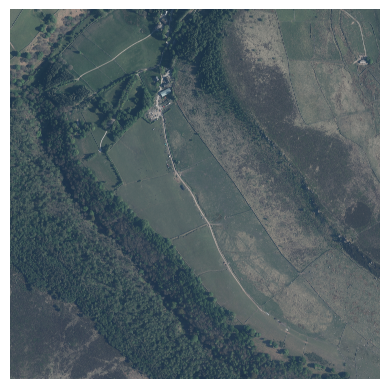

In [3]:
## Load image:

path_dict = loadpaths.loadpaths()
example_tiff_file = 'SJ9965.tif'
example_tiff_path = os.path.join(path_dict['image_path'], example_tiff_file)

ex_tile = lca.load_tiff(tiff_file_path=example_tiff_path, datatype='da')
lcv.plot_image_simple(im=ex_tile)

In [4]:
## Load landcover polygons:

df_lc_80s, mapping_class_inds = lca.load_landcover(pol_path=os.path.join(path_dict['lc_80s_path']))
df_lc_80s

,AREA,PERIMETER,LC_N_80,LC_D_80,MI_PRINX,geometry
0,2.288935e+05,1931.281171,19,Improved Pasture,1,"POLYGON ((407724.666 411168.713, 407854.641 41..."
1,8.103939e+05,6180.868624,12,Upland Heath/Grass Mosaic,2,"POLYGON ((407267.642 410992.244, 407326.372 41..."
2,3.024182e+06,30493.715242,7,Upland Grass Moor,3,"POLYGON ((405616.816 409724.857, 405615.571 40..."
3,3.141201e+06,17829.297205,8,Blanket Peat Grass Moor,4,"POLYGON ((406402.661 410926.453, 406419.695 41..."
4,5.524007e+03,360.239964,20,Rough Pasture,5,"POLYGON ((405569.382 410874.398, 405584.644 41..."
...,...,...,...,...,...,...
8477,2.946860e+03,210.674150,19,Improved Pasture,8478,"POLYGON ((416356.527 348866.777, 416357.591 34..."
8478,1.588031e+03,186.955561,1,Broadleaved High Forest,8479,"POLYGON ((412660.720 348649.559, 412658.280 34..."
8479,6.253066e+03,340.410463,36,Isolated Farmsteads (>0.25 ha),8480,"POLYGON ((412871.439 348609.371, 412858.033 34..."
8480,1.770921e+05,2285.262979,2,Coniferous High Forest,8481,"POLYGON ((411786.076 405491.149, 411803.349 40..."


<AxesSubplot:>

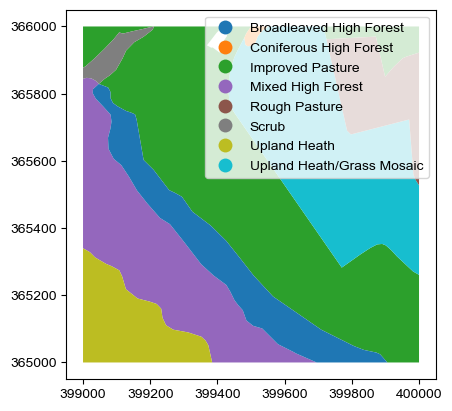

In [9]:
## Get intersection of polygons
df_tile = lca.load_coords_from_geotiff(tiff_file_path=example_tiff_path)  # turn raster tile into a polygon
dict_intersect_pols = lca.get_pols_for_tiles(df_pols=df_lc_80s, df_tiles=df_tile)

dict_intersect_pols['SJ9965'].plot(column='LC_D_80', legend=True)

In [10]:
dict_intersect_pols['SJ9965']

,geometry,LC_N_80,LC_D_80
0,"MULTIPOLYGON (((400000.000 365922.225, 399962....",19,Improved Pasture
1,"POLYGON ((399000.000 365844.327, 399010.304 36...",3,Mixed High Forest
2,"POLYGON ((399715.131 366000.000, 399724.565 36...",12,Upland Heath/Grass Mosaic
3,"POLYGON ((399547.335 366000.000, 399548.162 36...",2,Coniferous High Forest
4,"POLYGON ((399000.000 365876.947, 399008.490 36...",4,Scrub
5,"POLYGON ((400000.000 365527.238, 399988.152 36...",20,Rough Pasture
6,"POLYGON ((399695.310 365000.000, 399633.919 36...",1,Broadleaved High Forest
7,"POLYGON ((399000.000 365339.797, 399020.495 36...",6,Upland Heath


In [11]:
rasterio.mask.mask(ex_tile, dict_intersect_pols['SJ9965']['geometry'], nodata=np.nan, invert=False)

AttributeError: 'DataArray' object has no attribute 'transform'